In [2]:
# 把一些警告的讯息暂时关掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相关库
import os
import numpy as np
import mmap
from tqdm import tqdm

# 可视化相关库
import jieba
from gensim.corpora import WikiCorpus
from gensim.models import word2vec
from hanziconv import HanziConv
import matplotlib.pyplot as plt


In [8]:
# 文档的根目录路径
ROOT_DIR = os.getcwd()

# 训练/验证用的文档路径
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 模型目录
MODEL_PATH = os.path.join(ROOT_DIR, "jieba")

# 设定jieba自定义字典路径
JIEBA_DICTFILE_PATH = os.path.join(MODEL_PATH,"extra_dict", "dict.txt.big")

# 设定字典
jieba.set_dictionary(JIEBA_DICTFILE_PATH)

word2vec_model_file = "ok.model"

In [10]:
# 将wiki数据集下载后进行提取，且将 xml 转换成plain txt 
wiki_articles_xml_file = "zhwiki-latest-pages-articles.xml.bz2"
wiki_articles_txt_file = "zhwiki_plaintext.txt"

# 使用gensim.WikiCorpus来读取wiki XML中的corpus
wiki_corpus = WikiCorpus(wiki_articles_xml_file, dictionary = {})

# 迭代提取出來的词汇
with open(wiki_articles_txt_file, 'w', encoding='utf-8') as output:
    text_count = 0
    for text in wiki_corpus.get_texts():
        # 把词汇写进文件中备用
        output.write(' '.join(text) + '\n')
        text_count += 1
        if text_count % 10000 == 0:
            print("目前已处理 %d 篇文章" % text_count)

print("简繁转换已完毕, 总共处理了 %d 篇文章!"% text_count)


目前已处理 10000 篇文章
目前已处理 20000 篇文章
目前已处理 30000 篇文章
目前已处理 40000 篇文章
目前已处理 50000 篇文章
目前已处理 60000 篇文章
目前已处理 70000 篇文章
目前已处理 80000 篇文章
目前已处理 90000 篇文章
目前已处理 100000 篇文章
目前已处理 110000 篇文章
目前已处理 120000 篇文章
目前已处理 130000 篇文章
目前已处理 140000 篇文章
目前已处理 150000 篇文章
目前已处理 160000 篇文章
目前已处理 170000 篇文章
目前已处理 180000 篇文章
目前已处理 190000 篇文章
目前已处理 200000 篇文章
目前已处理 210000 篇文章
目前已处理 220000 篇文章
目前已处理 230000 篇文章
目前已处理 240000 篇文章
目前已处理 250000 篇文章
目前已处理 260000 篇文章
目前已处理 270000 篇文章
目前已处理 280000 篇文章
目前已处理 290000 篇文章
目前已处理 300000 篇文章
目前已处理 310000 篇文章
目前已处理 320000 篇文章
目前已处理 330000 篇文章
目前已处理 340000 篇文章
目前已处理 350000 篇文章
目前已处理 360000 篇文章
目前已处理 370000 篇文章
目前已处理 380000 篇文章
目前已处理 390000 篇文章
目前已处理 400000 篇文章
目前已处理 410000 篇文章
目前已处理 420000 篇文章
目前已处理 430000 篇文章
目前已处理 440000 篇文章
目前已处理 450000 篇文章
目前已处理 460000 篇文章
目前已处理 470000 篇文章
目前已处理 480000 篇文章
目前已处理 490000 篇文章
简繁转换已完毕, 总共处理了 497484 篇文章!


In [11]:
from gensim.models import word2vec

# 可参考 https://radimrehurek.com/gensim/models/word2vec.html 更多运用
print("word2vec模型训练中...")

#加载文件
sentence = word2vec.Text8Corpus("zhwiki_plaintext.txt")

# 设置参数和训练模型(Train)
model = word2vec.Word2Vec(sentence, window = 10, min_count = 5, workers = 4, sg = 1)

# 保存模型

model.wv.save_word2vec_format(word2vec_model_file, binary = True)

#model.wv.save_word2vec_format("wiki300.model.bin", binary = True)
print("Word2vec模型已存储完毕")


word2vec模型训练中...
Word2vec模型已存储完毕


In [30]:
from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format(word2vec_model_file, binary = True)
print("词汇相似词前 5 排序")
query_list=['学生']
res = word_vectors.most_similar(query_list[0], topn = 5)
for item in res:
    print(item[0] + "," + str(item[1]))
print("计算2个词汇间的 Cosine 相似度")
query_list=['手机','电脑']
res = word_vectors.similarity(query_list[0], query_list[1])
print(res)
query_list=['爸爸','父亲','医生']
print("%s之于%s，如%s之于" % (query_list[0], query_list[1], query_list[2]))
res = word_vectors.most_similar(positive = [query_list[0], query_list[1]], negative = [query_list[2]], topn = 5)
for item in res:
    print(item[0] + "," + str(item[1]))


词汇相似词前 5 排序
教师,0.8388667106628418
教职工,0.6806941628456116
余名,0.6782945394515991
名学生,0.6557402014732361
教员,0.6549882292747498
计算2个词汇间的 Cosine 相似度
0.613252
爸爸之于父亲，如医生之于
父親,0.7566571235656738
兒子,0.7125383019447327
弟弟,0.7048012614250183
父母,0.6851000785827637
祖父,0.6734575629234314


{'手机': array([-5.56806266e-01, -4.46088016e-02,  6.16311990e-02,  1.66002780e-01,
       -1.00894257e-01,  1.18736960e-01, -2.65782207e-01, -5.44757247e-01,
       -2.88610637e-01,  5.88442162e-02, -9.16981921e-02, -1.18565404e+00,
        4.06750590e-01,  4.10840772e-02,  6.86269283e-01,  2.94191111e-02,
       -9.27301310e-03,  2.58808047e-01,  6.21935129e-01, -2.24662066e-01,
        3.66409391e-01,  1.63003057e-01,  4.42026854e-02,  2.99662650e-01,
        1.75627753e-01, -1.72627941e-01,  5.69924355e-01, -4.75325584e-01,
        1.13763011e+00, -5.06598771e-01, -6.37623668e-02, -2.14994371e-01,
       -3.77869993e-01,  6.96272075e-01,  7.62005448e-01, -3.51289630e-01,
       -6.45946801e-01, -4.87860478e-02,  4.53053504e-01, -7.02916598e-03,
        2.49851540e-01, -2.21394345e-01, -1.90831013e-02, -1.08232819e-01,
        1.87603459e-01, -1.41856013e-04, -1.52081609e-01,  8.15238893e-01,
        4.91056681e-01,  1.36614904e-01, -2.14277089e-01,  3.68296176e-01,
        3.47241670

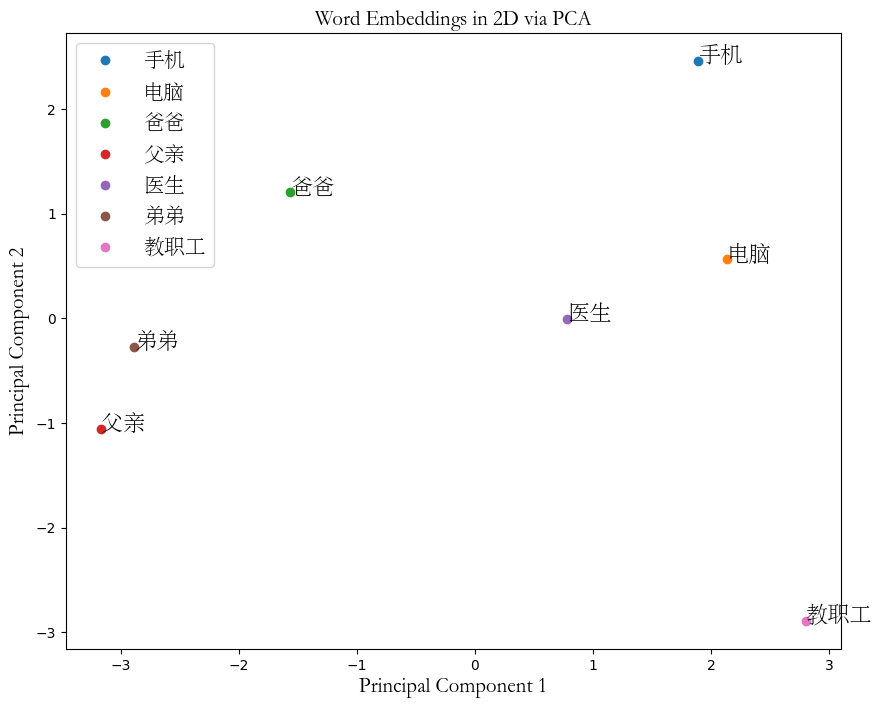

In [36]:
word2vec_dict = {}
words = ["手机", "电脑", "爸爸", "父亲", "医生", "弟弟", "教职工"]
for word in words:
    word_id = word_vectors.key_to_index[word]
    word2vec_dict[word] = word_vectors.vectors[word_id]

print(word2vec_dict)
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA  
  
# 假设 word2vec_dict 是你的数据字典，其中 features 是 numpy 数组或列表形式的特征向量  
# 例如: word2vec_dict = {"keyword1": np.array([...]), "keyword2": np.array([...]), ...}  
  
# 提取所有特征向量到列表中  
features_list = list(word2vec_dict.values())  
  
# 将列表转换为 numpy 数组，以便进行 PCA 分析  
features_array = np.array(features_list)  
  
# 初始化 PCA，n_components 设置为 2 表示降到二维  
pca = PCA(n_components=2)  
  
# 应用 PCA 转换特征  
transformed_features = pca.fit_transform(features_array)  
  
# 提取关键词列表  
keywords = list(word2vec_dict.keys())  

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"C:/Windows/Fonts/STSONG.TTF", size=15)

#plt.rcParams['font.sans-serif'] = ["DejaVuSansMono"]
# 绘制坐标图  
plt.figure(figsize=(10, 8))  
for i, (word, transformed) in enumerate(zip(keywords, transformed_features)):  
    # 绘制每个词的点  
    plt.scatter(transformed[0], transformed[1], label=word)  
    # 添加词标签（可选，如果词太多可能会重叠）  
    plt.text(transformed[0], transformed[1], word, fontsize=16,fontproperties=font_set)  
  
# 设置图例、标题和坐标轴标签  
plt.legend(prop=font_set)  
plt.title('Word Embeddings in 2D via PCA',fontproperties=font_set)  
plt.xlabel('Principal Component 1',fontproperties=font_set)  
plt.ylabel('Principal Component 2',fontproperties=font_set)  
# 显示图形  
plt.show()

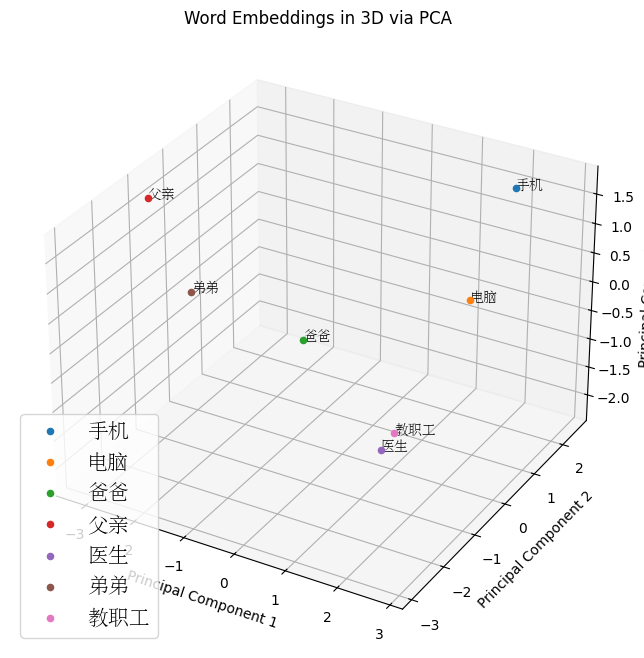

In [37]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.decomposition import PCA  
  
# 假设 word_vectors 是已经加载好的 Word2Vec 模型，并且 word_vectors.key_to_index 和 word_vectors.vectors 是有效的  
# word_vectors.key_to_index 是一个字典，将单词映射到它们的索引  
# word_vectors.vectors 是一个二维 numpy 数组，包含所有单词的向量  
  
word2vec_dict = {}  
words = ["手机", "电脑", "爸爸", "父亲", "医生", "弟弟", "教职工"]  
for word in words:  
    word_id = word_vectors.key_to_index[word]  
    word2vec_dict[word] = word_vectors.vectors[word_id]  
  
# 提取所有特征向量到列表中  
features_list = list(word2vec_dict.values())  
  
# 将列表转换为 numpy 数组，以便进行 PCA 分析  
features_array = np.array(features_list)  
  
# 初始化 PCA，n_components 设置为 3 表示降到三维  
pca = PCA(n_components=3)  
  
# 应用 PCA 转换特征  
transformed_features = pca.fit_transform(features_array)  
  
# 提取关键词列表  
keywords = list(word2vec_dict.keys())  
  
# 绘制三维坐标图  
fig = plt.figure(figsize=(10, 8))  
ax = fig.add_subplot(111, projection='3d')  

from matplotlib.font_manager import FontProperties 
font_set = FontProperties(fname=r"C:/Windows/Fonts/STSONG.TTF", size=15)

for i, (word, transformed) in enumerate(zip(keywords, transformed_features)):  
    # 绘制每个词的点  
    ax.scatter(transformed[0], transformed[1], transformed[2], label=word)  
    # 添加词标签（可选，如果词太多可能会重叠）  
    ax.text(transformed[0], transformed[1], transformed[2], word, fontsize=10,fontproperties=font_set)  
  
# 设置图例、标题和坐标轴标签  
ax.legend(prop=font_set)  
ax.set_title('Word Embeddings in 3D via PCA')  
ax.set_xlabel('Principal Component 1')  
ax.set_ylabel('Principal Component 2')  
ax.set_zlabel('Principal Component 3')  
  
# 显示图形  
plt.show()